# Scenario 1:

It is going to be a huge Saturday and there will need to be many more cars on the road than last week. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost:

Option 1: $50 for each driver that is online at least 8 hours, accepts 90% of requests, completes 10 trips, and has a rating of 4.7 or better during the time frame；

Option 2: $4/trip for all drivers who complete 12 trips, and have a 4.7 or better rating.

First import pandas library and read the data

In [4]:
import pandas as pd

df = pd.read_csv('dataset_2.csv')
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


Check each column's data type 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             119 non-null    object 
 1   Trips Completed  119 non-null    int64  
 2   Accept Rate      119 non-null    object 
 3   Supply Hours     119 non-null    int64  
 4   Rating           119 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


Convert accept rate to float for the convenience of the following analysis

In [8]:
df['Accept Rate'] = df['Accept Rate'].apply(lambda x: float(x[:-1]))
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100.0,3,4.8
1,Abraham,12,83.0,5,4.7
2,Adelina,1,100.0,2,4.7
3,Akilah,1,100.0,2,4.9
4,Alec,21,76.0,11,5.0


In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

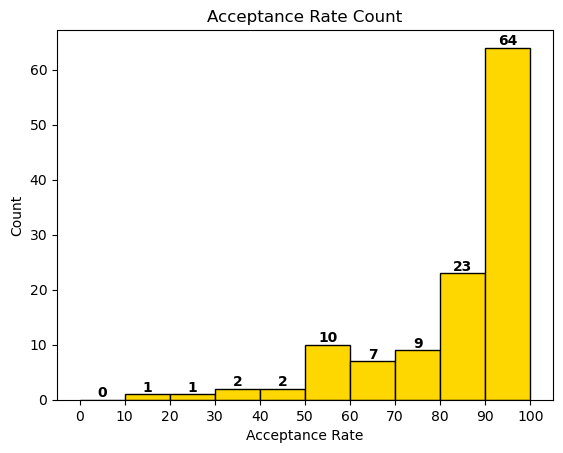

In [22]:
counts, edges, patches = plt.hist(df["Accept Rate"], bins = np.arange(0, 110, 10), color='gold', edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Acceptance Rate")
plt.xticks(np.arange(0, 101, step = 10))
plt.title("Acceptance Rate Count")

for count, edge in zip(counts, edges[:-1]):  # edges[:-1] gives the left bin edges
    plt.text(edge + 5, count + 0.5, str(int(count)), ha='center', fontsize=10, fontweight='bold')

plt.savefig("my_plot.png", dpi=300)

<Figure size 500x200 with 0 Axes>

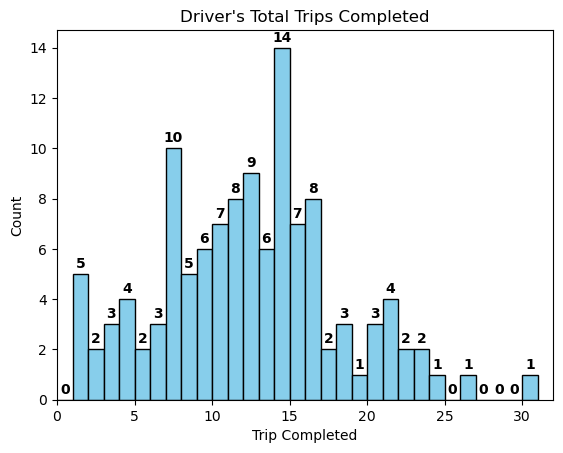

<Figure size 500x200 with 0 Axes>

In [24]:
counts, edges, patches = plt.hist(df["Trips Completed"], bins=np.arange(0, 32), color='skyblue', edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Trip Completed")
plt.title("Driver's Total Trips Completed")
plt.xlim([0,32])
for count, edge in zip(counts, edges[:-1]):  # edges[:-1] gives the left bin edges
    plt.text(edge + 0.5 , count+0.25, str(int(count)), ha='center', fontsize=10, fontweight='bold')
plt.savefig("driver.png", dpi=300)
plt.figure(figsize=(5, 2))

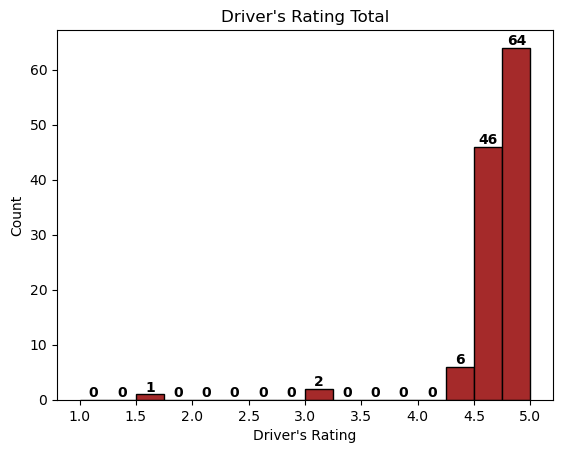

In [26]:
counts, edges, patches = plt.hist(df["Rating"], bins=np.arange(1, 5.25, 0.25), color= '#A52A2A', edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Driver's Rating")
plt.xticks(np.arange(1, 5.25, step = 0.5))
for count, edge in zip(counts, edges[:-1]):  # edges[:-1] gives the left bin edges
    plt.text(edge + 0.125, count+0.5, str(int(count)), ha='center', fontsize=10, fontweight='bold')
plt.title("Driver's Rating Total")
plt.savefig("driver_rating.png", dpi=300)

<Figure size 500x200 with 0 Axes>

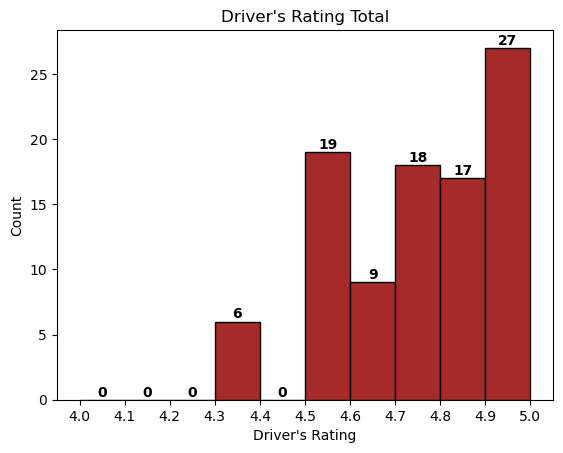

<Figure size 500x200 with 0 Axes>

In [28]:
counts, edges, patches = plt.hist(df["Rating"], bins=np.arange(4, 5.01, 0.10), color= '#A52A2A', edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Driver's Rating")
plt.xticks(np.arange(4, 5.05, step = 0.10))
plt.title("Driver's Rating Total")
for count, edge in zip(counts, edges[:-1]):  # edges[:-1] gives the left bin edges
    plt.text(edge + 0.05, count+0.25, str(int(count)), ha='center', fontsize=10, fontweight='bold')
plt.savefig("driver_rating_2.png", dpi=300)
plt.figure(figsize=(5, 2))

#### Q1: How much would the total bonus payout be with Option 1?

Apply four conditions on df and filter out the drivers who satisfy the requirements

In [95]:
option_one = df[(df['Supply Hours'] >= 8) & (df['Trips Completed'] >= 10) & (df['Accept Rate'] >= 90) & (df['Rating'] >= 4.7)]
option_one.head()


,Name,Trips Completed,Accept Rate,Supply Hours,Rating
11,Byron,15,100.0,10,4.9
12,Carlota,14,100.0,8,5.0
19,Dannette,14,100.0,9,4.9
23,Demetrius,14,100.0,9,5.0
26,Dimple,15,100.0,10,4.9


Total payoff equals to the number of drivers times $50

In [96]:
f'Option 1 costs ${50 * len(option_one)} bonus payoff'

'Option 1 costs $1050 bonus payoff'

#### Q2: How much would the total bonus payout be with Option 2?

Apply two conditions on df and filter out the drivers who satisfy the requirements

In [97]:
option_two = df[(df['Trips Completed'] >= 12) & (df['Rating'] >= 4.7)]
option_two.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
1,Abraham,12,83.0,5,4.7
4,Alec,21,76.0,11,5.0
8,Augusta,19,84.0,11,4.7
10,Buffy,13,54.0,6,5.0
11,Byron,15,100.0,10,4.9


Total payoff equals to above drivers' sum of trips times $4

In [98]:
payoff_two = 4 * option_two['Trips Completed'].sum()
f'Option 2 costs ${payoff_two} bonus payoff'

'Option 2 costs $2976 bonus payoff'

#### Q3: How many drivers would qualify for a bonus under Option 1 but not under Option 2?

Both option 1 and option 2 requires drivers to have a 4.7 or better rating, while options 2 needs drivers to completes 12 trips. Therefor, the drivers who qualify for a bonus under  option 1 but not option 2 are those who (1) are online at least 8 hours, (2) accept 90% of requests, and (3) complete 10 or 11 trips.

In [99]:
one_but_not_two = df[(df['Supply Hours'] >= 8) & (df['Trips Completed'].isin((10,11))) & (df['Accept Rate'] >= 90) & (df['Rating'] >= 4.7)]
one_but_not_two.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
88,Oren,11,91.0,9,4.8
92,Phyllis,10,90.0,8,4.8


In [100]:
f'There are {len(one_but_not_two)} drivers who qualify for a bonus under option 1 but not under option 2'

'There are 2 drivers who qualify for a bonus under option 1 but not under option 2'

#### Q4: What percentages of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher?

Apply there three conditions on df

In [101]:
less_active = df[(df['Trips Completed'] < 10) & (df['Accept Rate'] < 90) & (df['Rating'] >= 4.7)]

In [102]:
f'{len(less_active) / len(df) * 100}% of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher'

'10.92436974789916% of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher'

# Scenario 2:

A taxi driver currently generates $200 per day in fares (before expenses), works six days a week, takes three weeks off, and has the following expenses:

Gas - $200 per week

Insurance - $400 per month

Vehicle rent (by the week) - $500

The driver doesn't pay gas and rent expenses on off weeks. Now, let's assume that the same driver would buy a Town Car and partner with Uber. If he does, his gas expenses would go up by 5%, his insurance expense would decrease by 20%, and he would no longer be renting a vehicle. However, he would need to buy a car. The driver would still take three weeks off per year.

#### Q5: How much money (after expenses) does the taxi driver make per year without partnering with Uber?

In [103]:
income = 200 * (52 - 3) * 6
f'Income is ${income}'

'Income is $58800'

In [104]:
expense = (200 + 500) * (52 - 3) + 400 * 12
f'Expense is ${expense}'

'Expense is $39100'

In [105]:
profit = income - expense
f'The taxi driver makes ${profit} per year without partnering with Uber'

'The taxi driver makes $19700 per year without partnering with Uber'

#### Q6: You are convincing the same driver above to buy a Town Car and partner with Uber. Assuming the new car is 40,000 USD, how much would the driver's gross fares need to increase per week to fully pay for the car in year 1 and maintain the same yearly profit margin as before?

The income remains the same, so we can first recalculate the expense

In [106]:
new_expense = 40000 + 200 * (52 - 3) * 1.05 + 400 * 12 * 0.8
f'New expense is ${new_expense}'

'New expense is $54130.0'

The new expense is higher than old expense, so to maintain the same yearly profit margin, the driver must increase income. The amount of increase in income equals to the amount of increase in expense.

In [107]:
gap = new_expense - expense
f'The drive must make ${gap} fares in year 1'

'The drive must make $15030.0 fares in year 1'

Now divide this number by week

In [108]:
f'The driver must increase gross fares by ${gap/49} per week'

'The driver must increase gross fares by 306.734693877551 per week'